In [1]:
# prepared by Sam. feel free to consult (sirmaxford@gmail.com).
import matplotlib.pyplot as plt; import pandas as pd; import numpy as np
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from scipy.interpolate import UnivariateSpline
%matplotlib inline
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

In [2]:
columns = ['r', 'b', 'atp', 'md', 'v_av', 'v_sd']
df = pd.read_csv('vel_changes.csv', names=columns)

In [3]:
df[0:10]

,r,b,atp,md,v_av,v_sd
0,0.1,13,2000,3000,0.09893,0.08043
1,0.2,13,2000,3000,0.49694,0.44099
2,0.3,13,2000,3000,5.14376,3.07438
3,0.4,13,2000,3000,5.41553,2.34461
4,0.5,13,2000,3000,6.04005,3.28116
5,0.6,13,2000,3000,6.66972,1.15667
6,0.7,13,2000,3000,6.79622,1.10787
7,0.8,13,2000,3000,6.76524,1.07794
8,0.9,13,2000,3000,6.56418,1.04057
9,1.0,13,2000,3000,6.39632,0.53641


In [4]:
r_change = df[0:10]

In [5]:
r_change['v_av']

0    0.09893
1    0.49694
2    5.14376
3    5.41553
4    6.04005
5    6.66972
6    6.79622
7    6.76524
8    6.56418
9    6.39632
Name: v_av, dtype: float64

In [6]:
x = r_change['r']
y = r_change['v_av']
xx = np.linspace(x.min(), x.max(), 1000)

# interpolate + smooth
itp = interp1d(x,y, kind='linear')
window_size, poly_order = 101, 3
yy_sg = savgol_filter(itp(xx), window_size, poly_order)

# or fit to a global function
def func(x, A, B, x0, sigma):
    return A+B*np.tanh((x-x0)/sigma)

fit, _ = curve_fit(func, x, y) #, bounds=(0.0,[1.0,0.3,0.6]))
yy_fit = func(xx, *fit)

#s = UnivariateSpline(x, y, s=2)
#xs = np.linspace(x.min(), x.max(), 100)
#ys = s(xs)

/home/nitta/.local/lib/python3.5/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/nitta/.local/lib/python3.5/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


$f(x) = A + B \tanh\left(\frac{x-x_0}{\sigma}\right)$

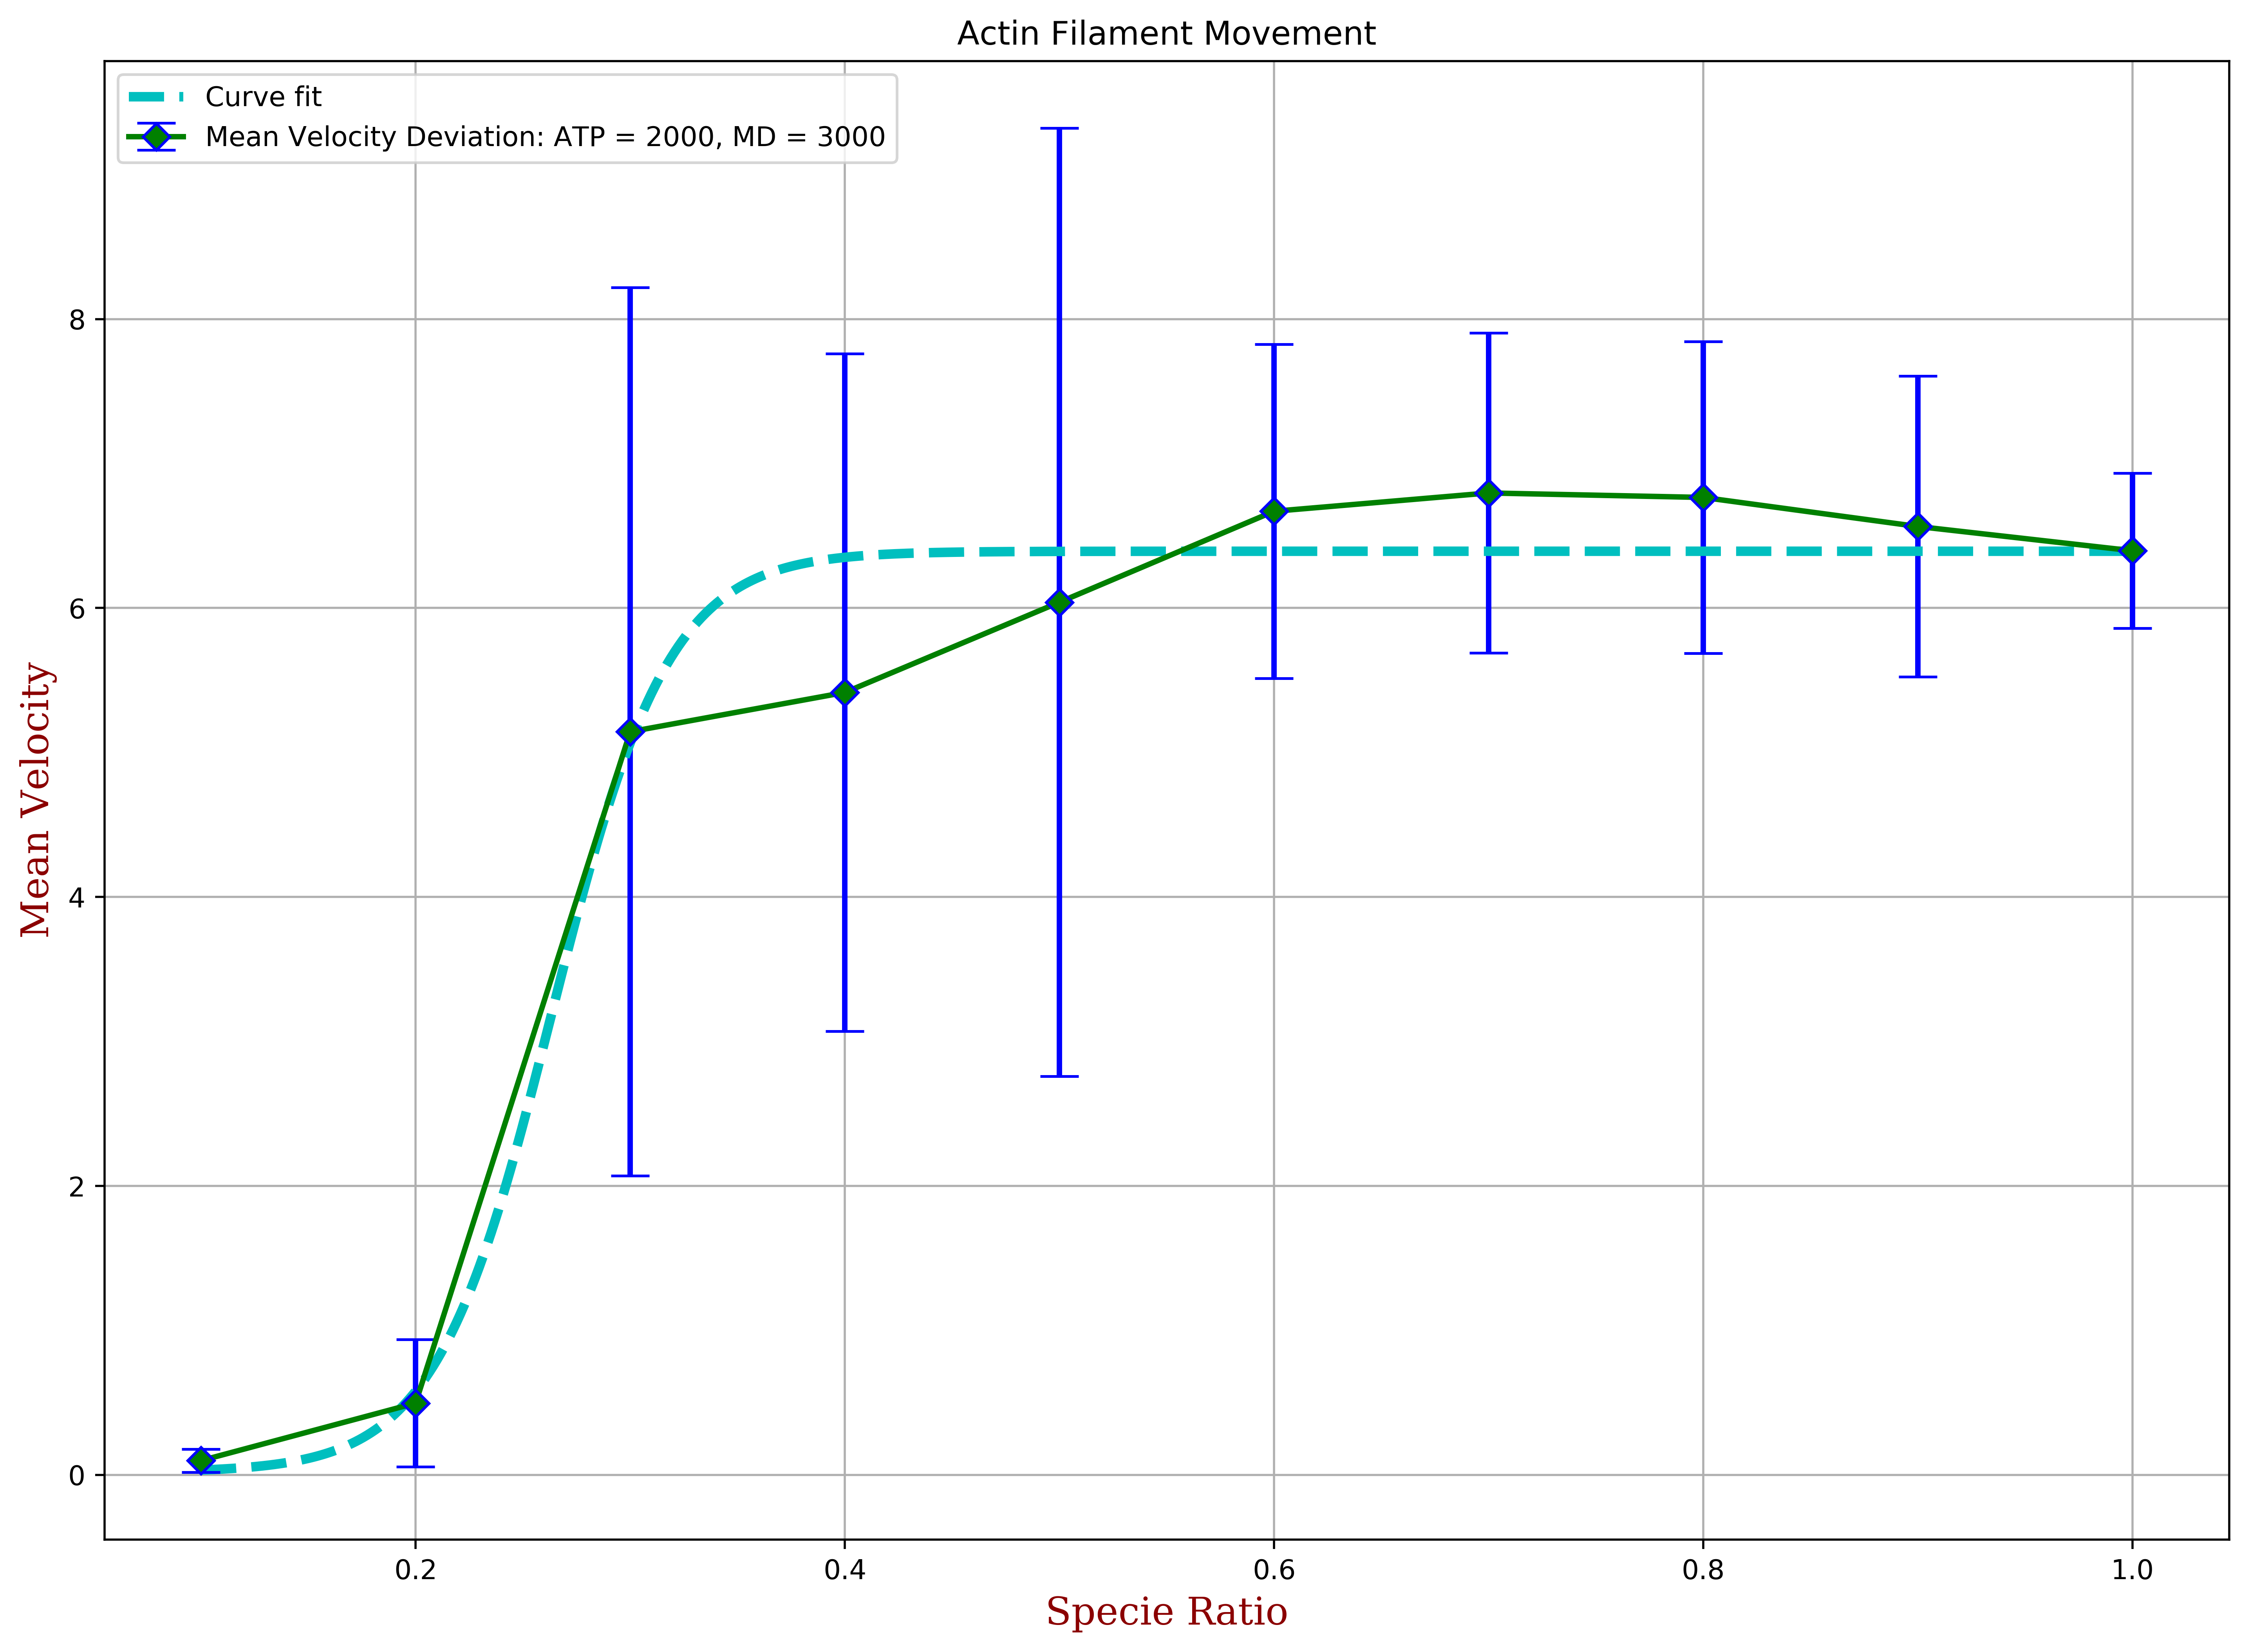

In [7]:
#plt.figure(figsize=(10,8))
plt.figure(figsize=(14,10), dpi=500)
#plt.plot(xx, yy_sg, 'k', label= "Smoothed curve")
#plt.plot(xs, ys)
plt.plot(xx, yy_fit, 'c--', linewidth=3.5, label= "Curve fit")
plt.errorbar(x,y,yerr=r_change['v_sd'], ecolor='b', capsize=7, \
             mec='blue', color='green', marker='D', linewidth=2, \
             markersize=7, label='Mean Velocity Deviation: ATP = 2000, MD = 3000')
plt.xlabel('Specie Ratio', fontdict=font); plt.ylabel('Mean Velocity', fontdict=font)
plt.title('Actin Filament Movement'); plt.legend(loc='upper left'); plt.grid()

In [8]:
df[10:25]

,r,b,atp,md,v_av,v_sd
10,0.9,13,300,3000,3.16475,0.42185
11,0.9,13,600,3000,4.48637,0.46199
12,0.9,13,900,3000,5.22617,0.92963
13,0.9,13,1200,3000,5.47609,0.44497
14,0.9,13,1500,3000,6.15356,0.56837
15,0.9,13,1800,3000,6.38277,1.16754
16,0.9,13,2100,3000,6.64491,0.93268
17,0.9,13,2400,3000,6.67938,0.61918
18,0.9,13,2700,3000,6.65730,0.78833
19,0.9,13,3000,3000,7.02342,0.40345


In [9]:
atp_change = df[10:25]

In [10]:
x = atp_change['atp']
y = atp_change['v_av']
xx = np.linspace(x.min(), x.max(), 1000)

# interpolate + smooth
itp = interp1d(x,y, kind='linear')
window_size, poly_order = 101, 3
yy_sg = savgol_filter(itp(xx), window_size, poly_order)

# or fit to a global function
#def func(x, A, B, x0, sigma):
#    return A+B*np.tanh((x-x0)/sigma)

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

fit, _ = curve_fit(func, x, y)
yy_fit = func(xx, *fit)

/home/nitta/.local/lib/python3.5/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/nitta/.local/lib/python3.5/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


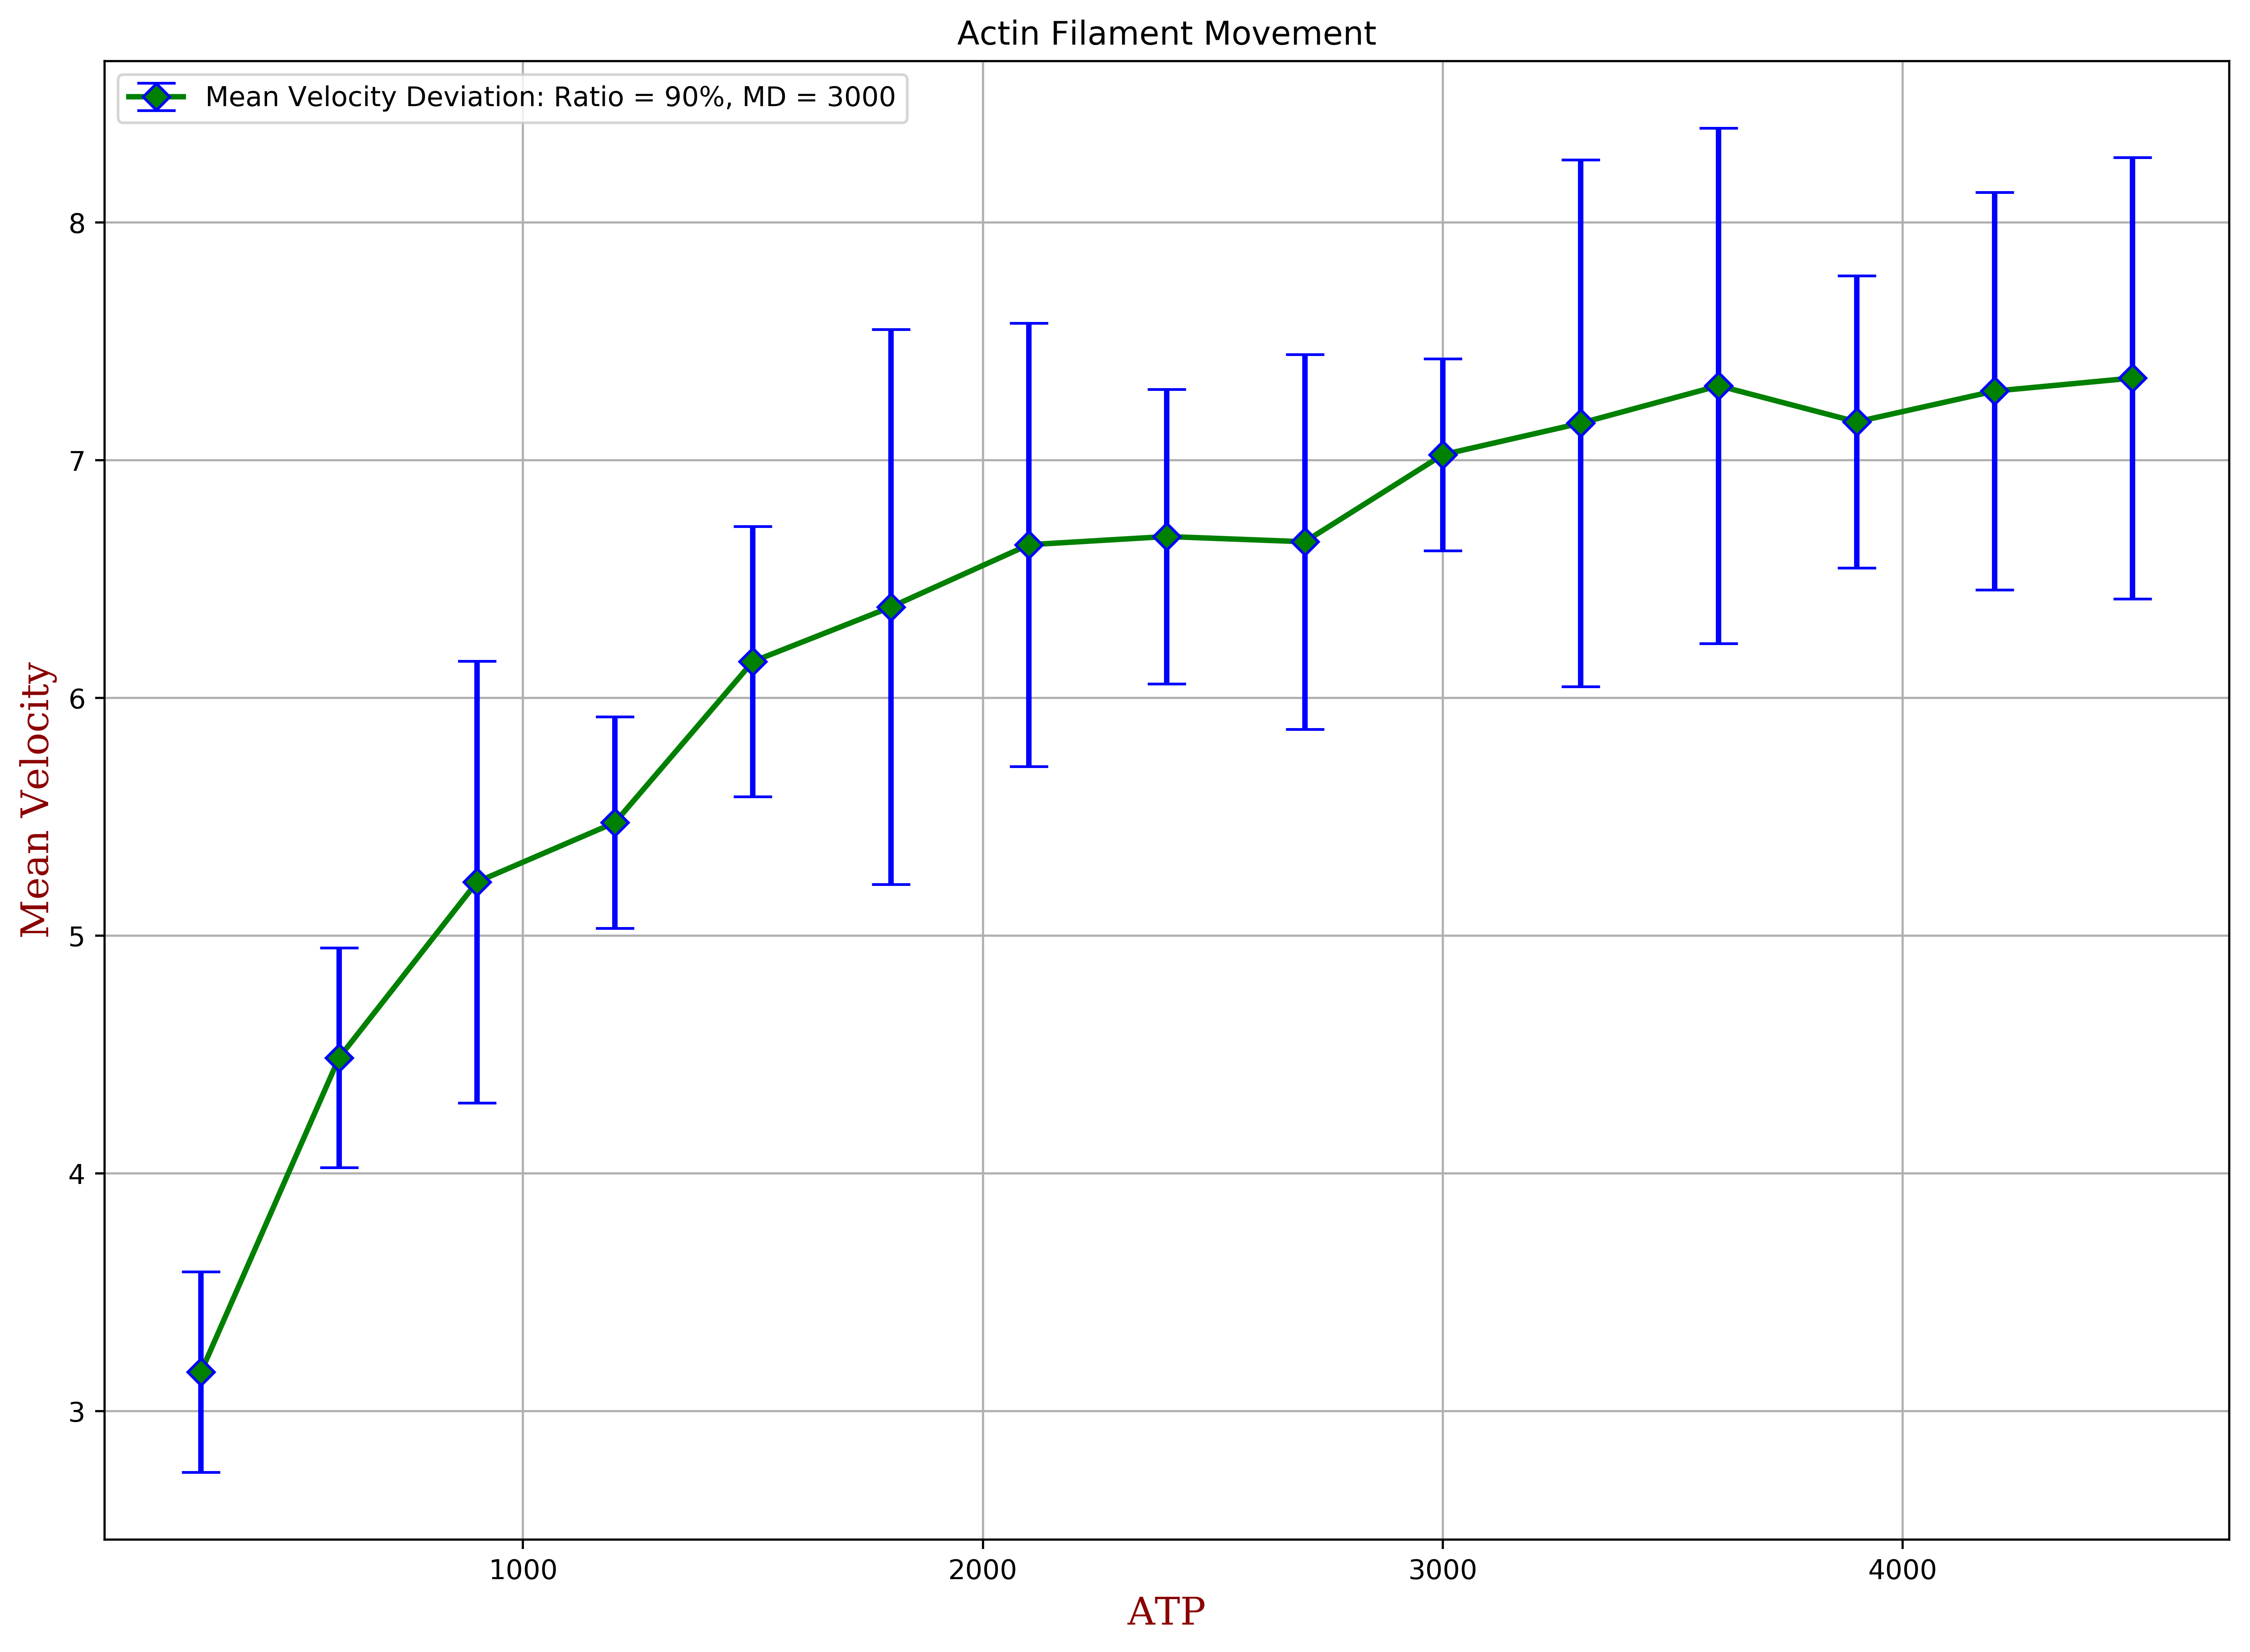

In [11]:
plt.figure(figsize=(14,10), dpi=500)
#plt.plot(xx, yy_fit, 'c--', linewidth=3.5, label= "Curve fit")
plt.errorbar(x,y,yerr=atp_change['v_sd'], ecolor='b', capsize=7, \
             mec='blue', color='green', marker='D', linestyle='-', linewidth=2, \
             markersize=7, label='Mean Velocity Deviation: Ratio = 90%, MD = 3000')
plt.xlabel('ATP', fontdict=font); plt.ylabel('Mean Velocity', fontdict=font)
plt.title('Actin Filament Movement'); plt.legend(loc='upper left'); plt.grid()

In [12]:
df[25:30]

,r,b,atp,md,v_av,v_sd
25,0.9,13,2000,1000,5.93888,2.88525
26,0.9,13,2000,2000,6.73108,1.30774
27,0.9,13,2000,3000,6.56418,1.04057
28,0.9,13,2000,4000,6.39449,0.50562
29,0.9,13,2000,5000,5.77560,1.90921


In [13]:
md_change = df[25:30]

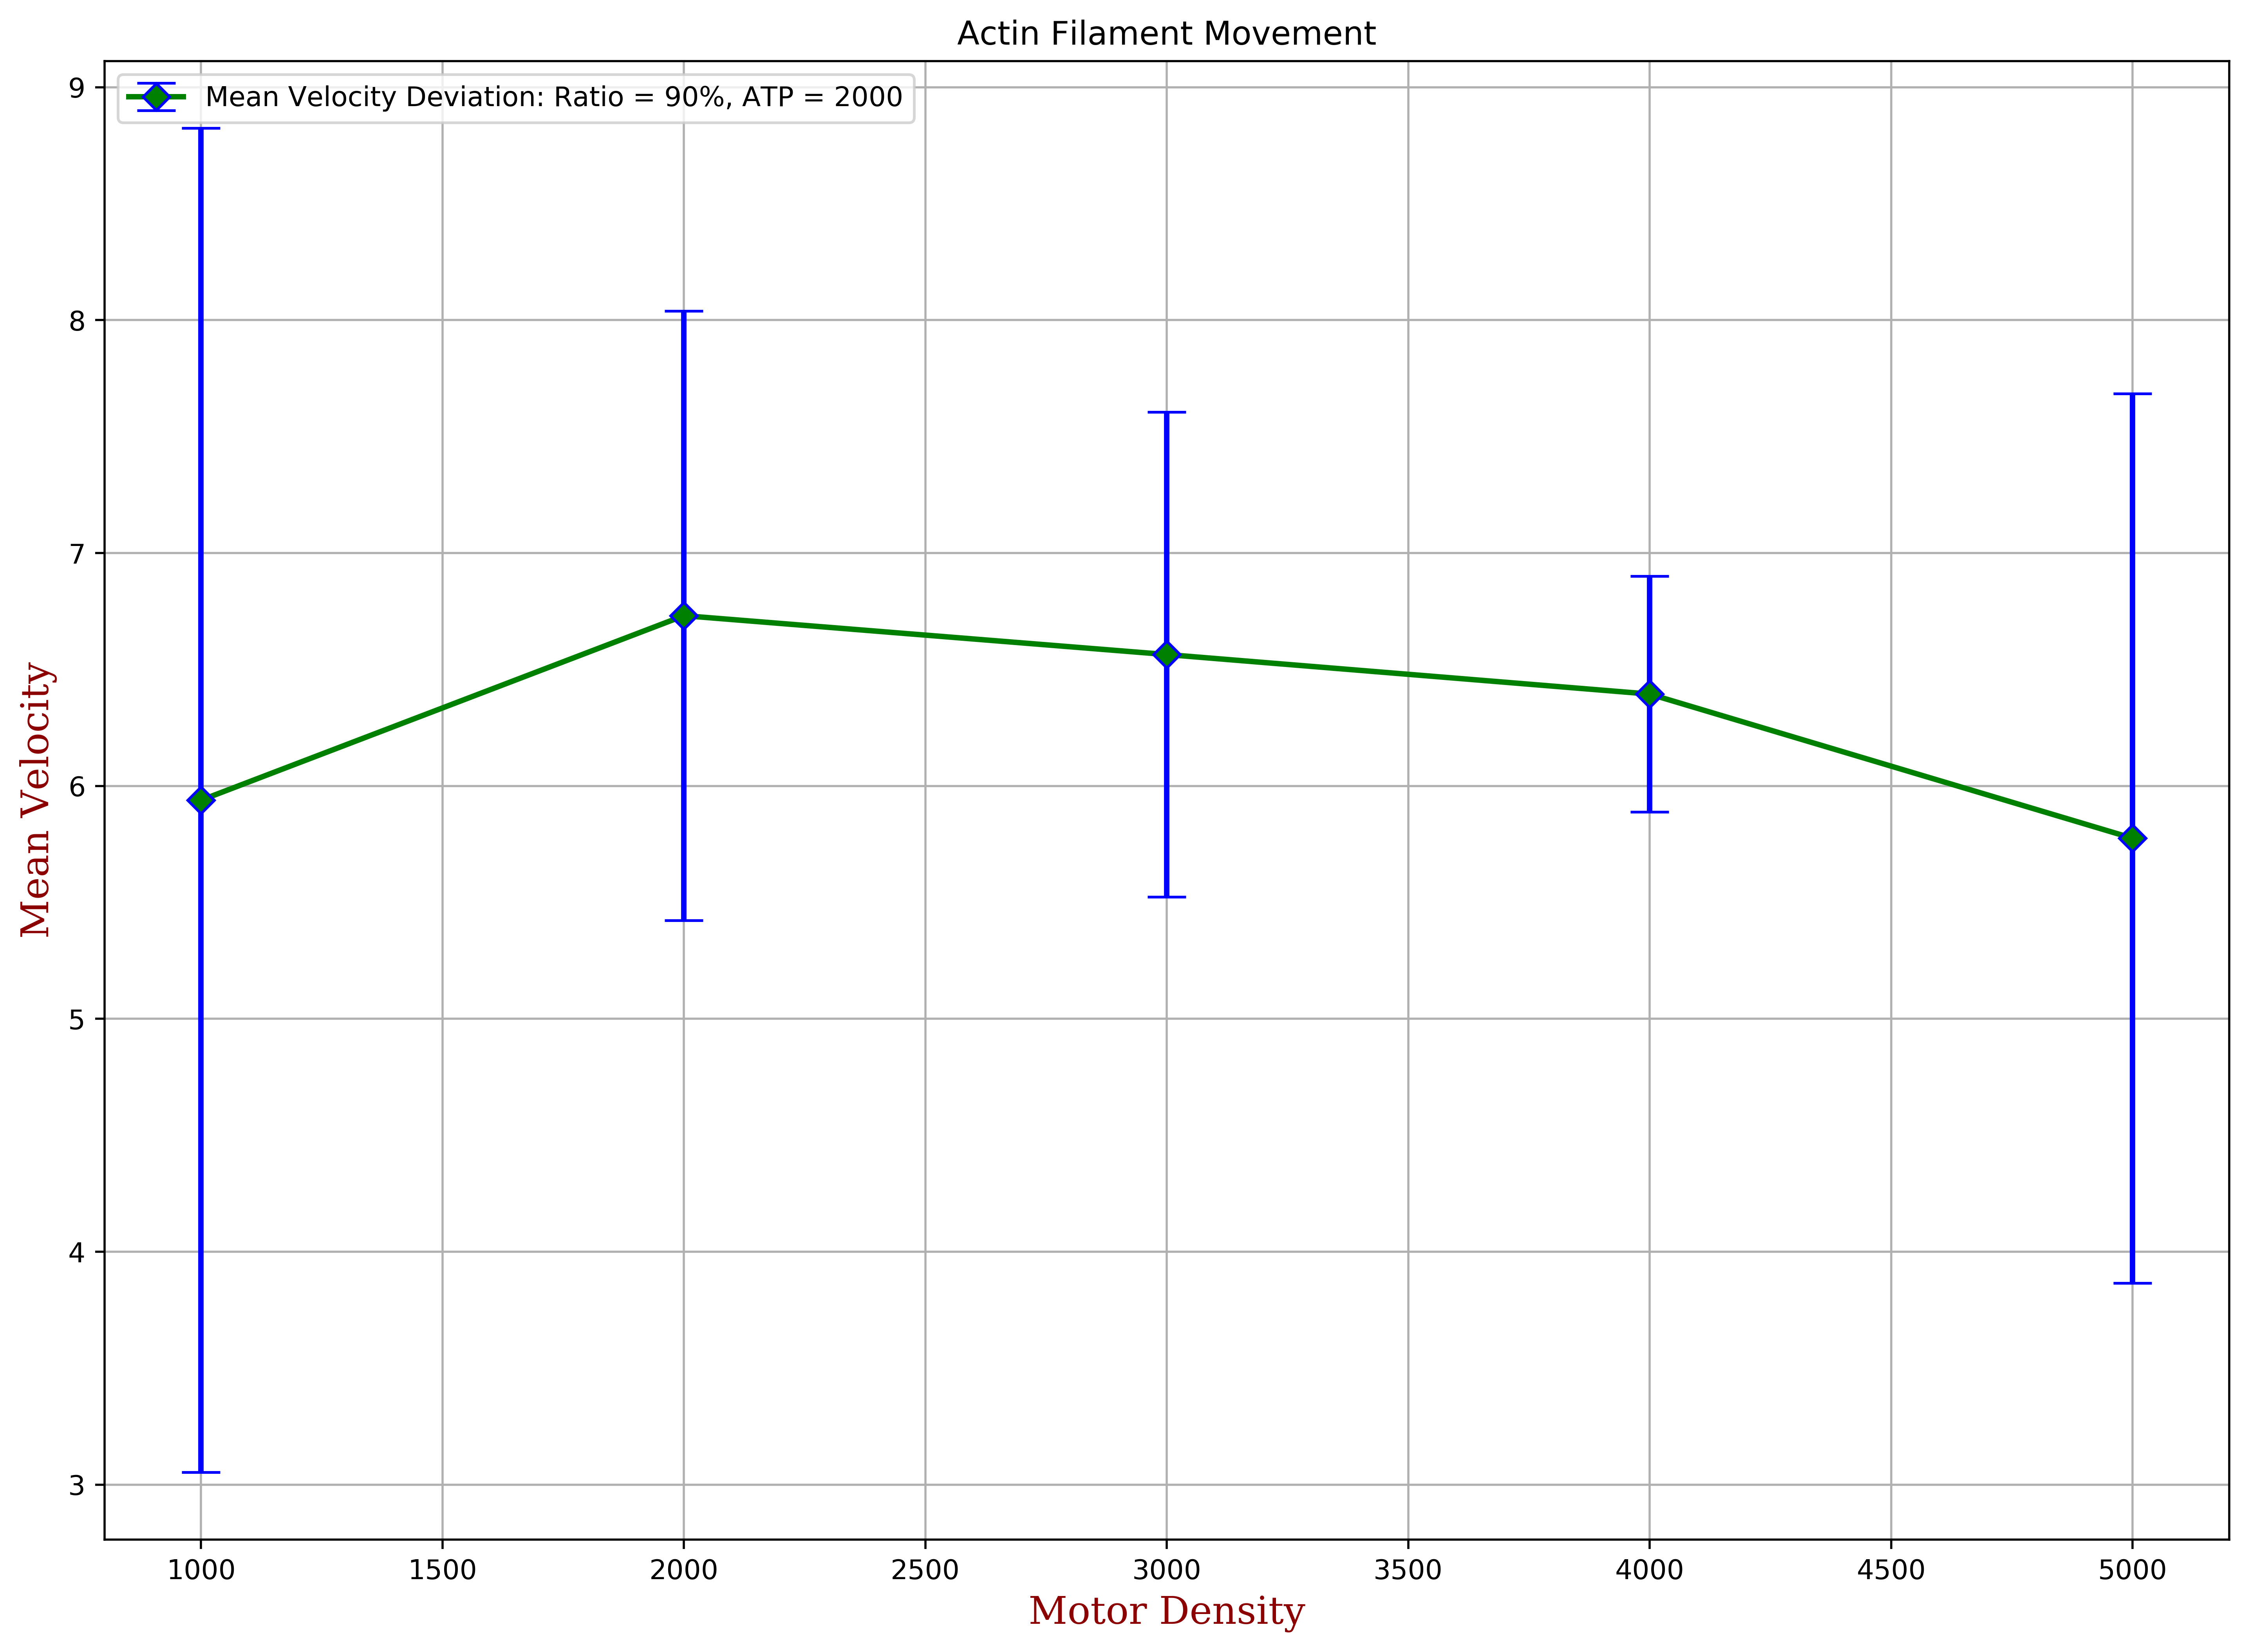

In [14]:
plt.figure(figsize=(14,10), dpi=500)
plt.errorbar(md_change['md'],md_change['v_av'],yerr=md_change['v_sd'], ecolor='b', capsize=7, \
             mec='blue', color='green', marker='D', linestyle='-', linewidth=2, \
             markersize=7, label='Mean Velocity Deviation: Ratio = 90%, ATP = 2000')
plt.xlabel('Motor Density', fontdict=font); plt.ylabel('Mean Velocity', fontdict=font)
plt.title('Actin Filament Movement'); plt.legend(loc='upper left'); plt.grid()

In [15]:
conf_names = ['beads', 'x', 'y', 'z']
df_conf = pd.read_csv('Conformation_A001.txt', names=conf_names, delim_whitespace=True)
df_conf = df_conf.drop(['beads', 'x', 'y'], axis=1)
df_conf = df_conf[13:]
df_z = df_conf.iloc[0::13, :]

In [16]:
df_z.shape

(300, 1)

In [17]:
tip_names = ['time', 'x_tip', 'y_tip']
df_tip = pd.read_csv('TipXY_A001.txt', names=tip_names, delim_whitespace=True)
df_time = df_tip.drop(columns=['x_tip','y_tip'])
df_time = df_time[1:]
df_time.shape

(300, 1)

In [18]:
Dx_tip = np.diff(df_tip['x_tip']); Dy_tip = np.diff(df_tip['y_tip'])
dist=np.sqrt((Dx_tip**2)+(Dy_tip**2))
tym=0.01
vel_tip = dist/tym
vel_tip.shape

(300,)

<h2>R0.9LAF3ATP3300MD3000</h2>

![alt text](R0.9LAF3ATP3300MD3000.png "R0.9LAF3ATP3300MD3000")

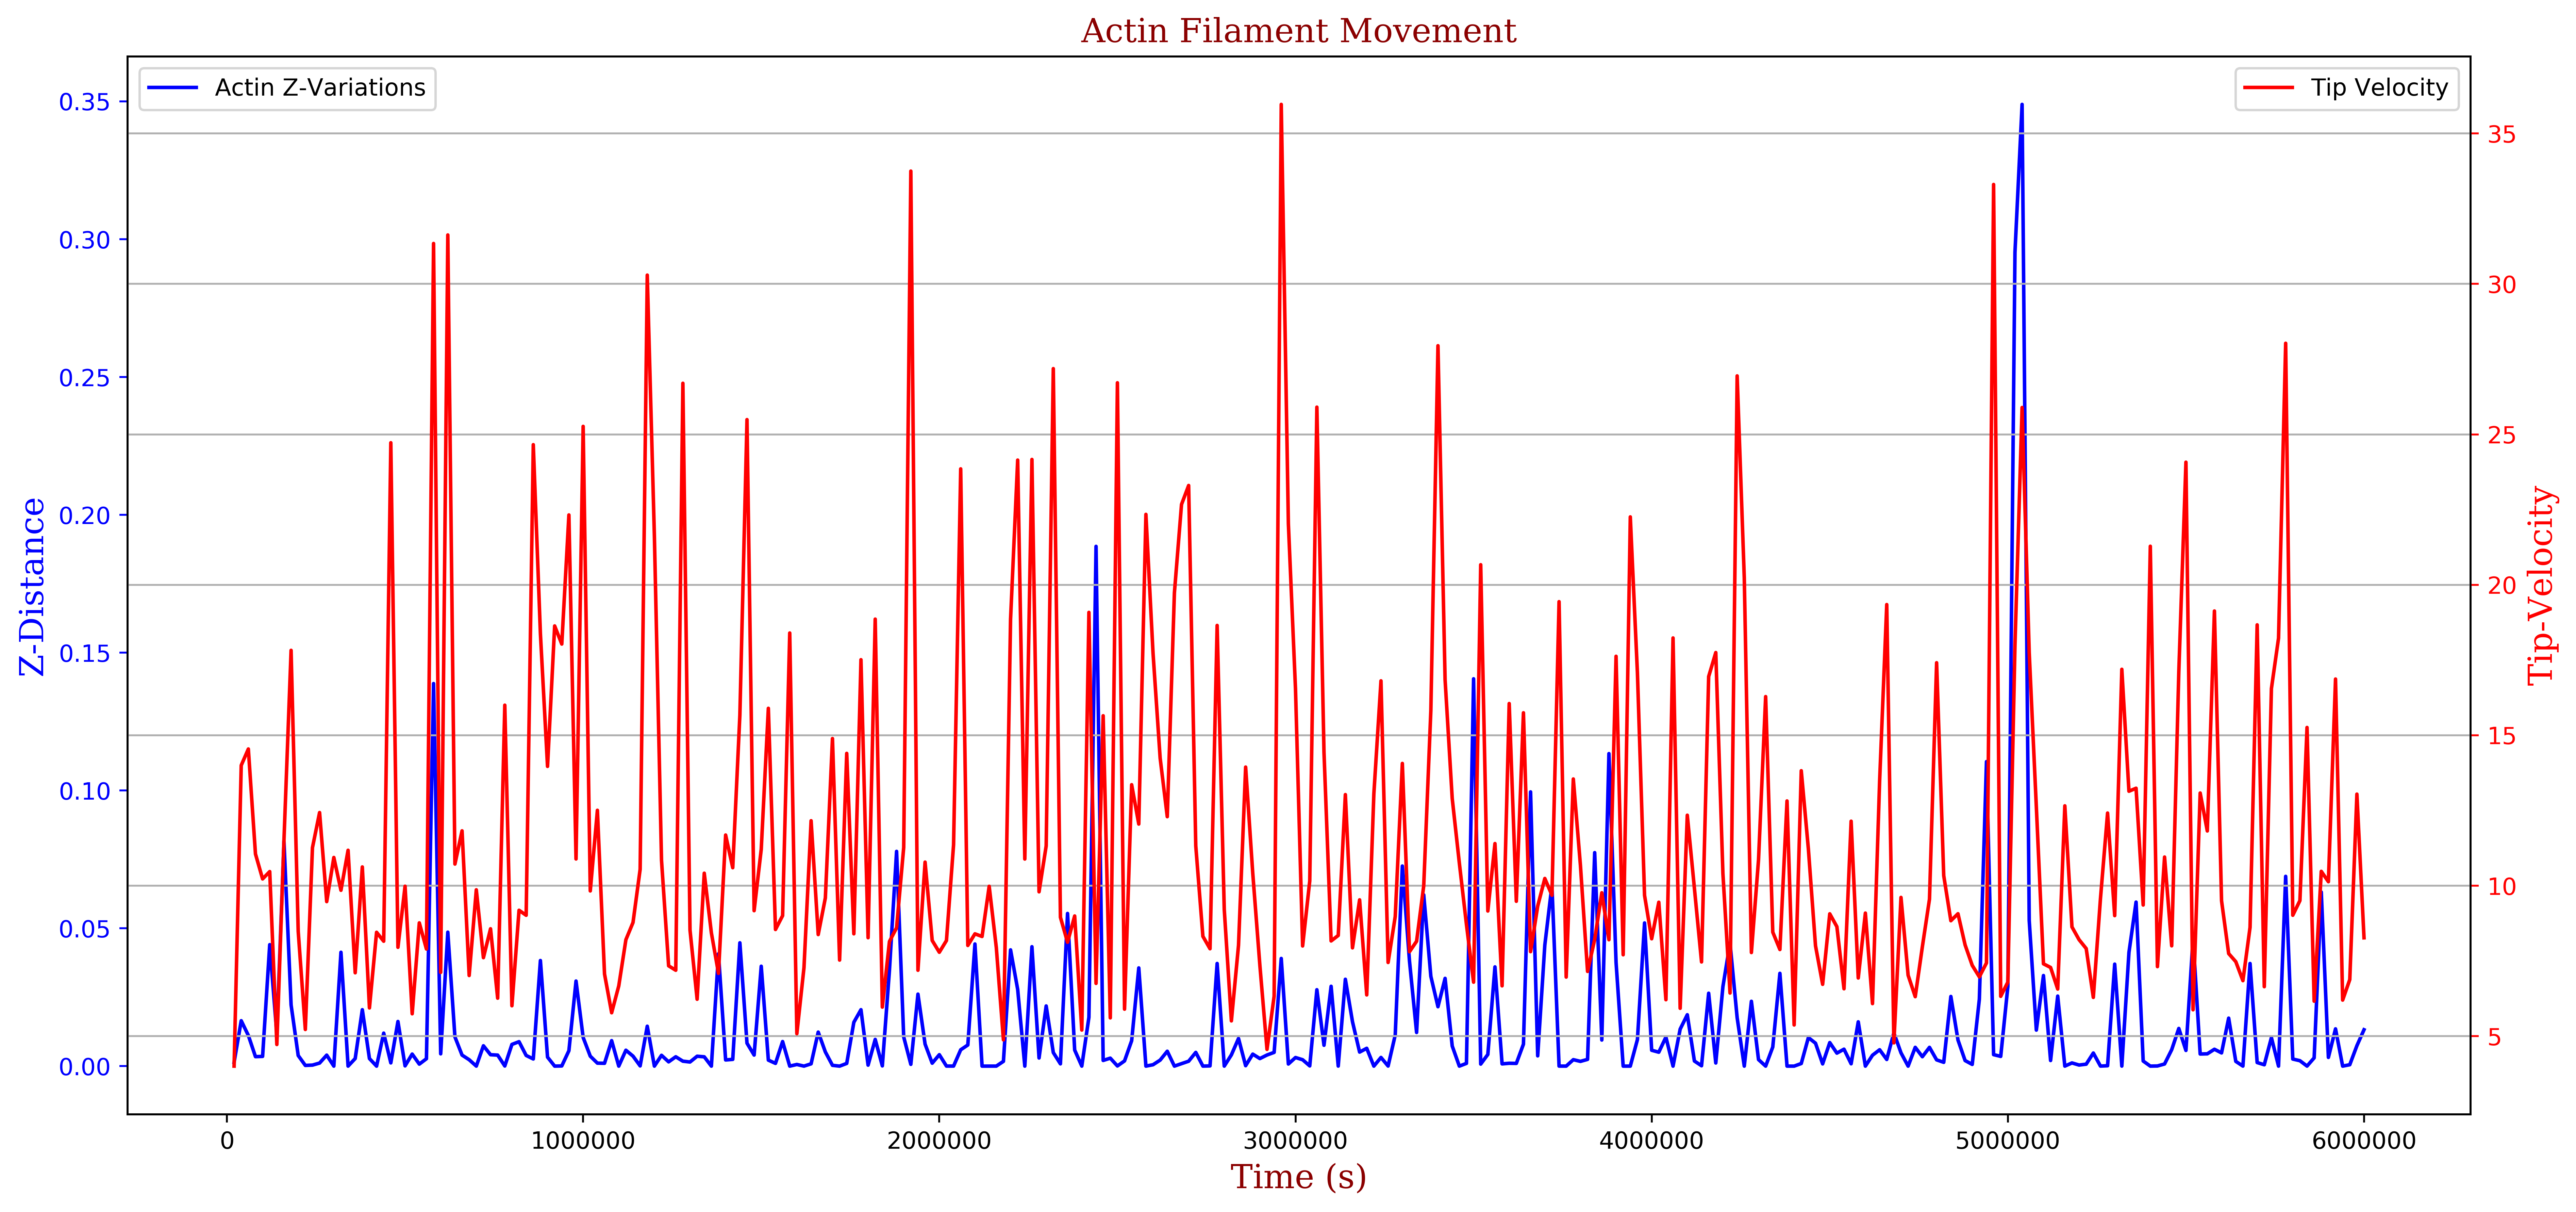

In [19]:
fig, ax1 = plt.subplots(dpi=500)
ax1.plot(df_time,df_z, 'b', label='Actin Z-Variations')
ax1.set_xlabel('Time (s)',fontdict=font)
ax1.set_ylabel('Z-Distance', color='b',fontdict=font)
ax1.tick_params('y', colors='b')
plt.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(df_time,vel_tip, 'r', label='Tip Velocity')
fig.set_size_inches([15, 7])
fig.tight_layout()
ax2.set_ylabel('Tip-Velocity', color='r',fontdict=font)
ax2.tick_params('y', colors='r')
plt.title('Actin Filament Movement',fontdict=font); plt.legend(loc='upper right')
plt.grid(); plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f12b8925588>],
      dtype=object)

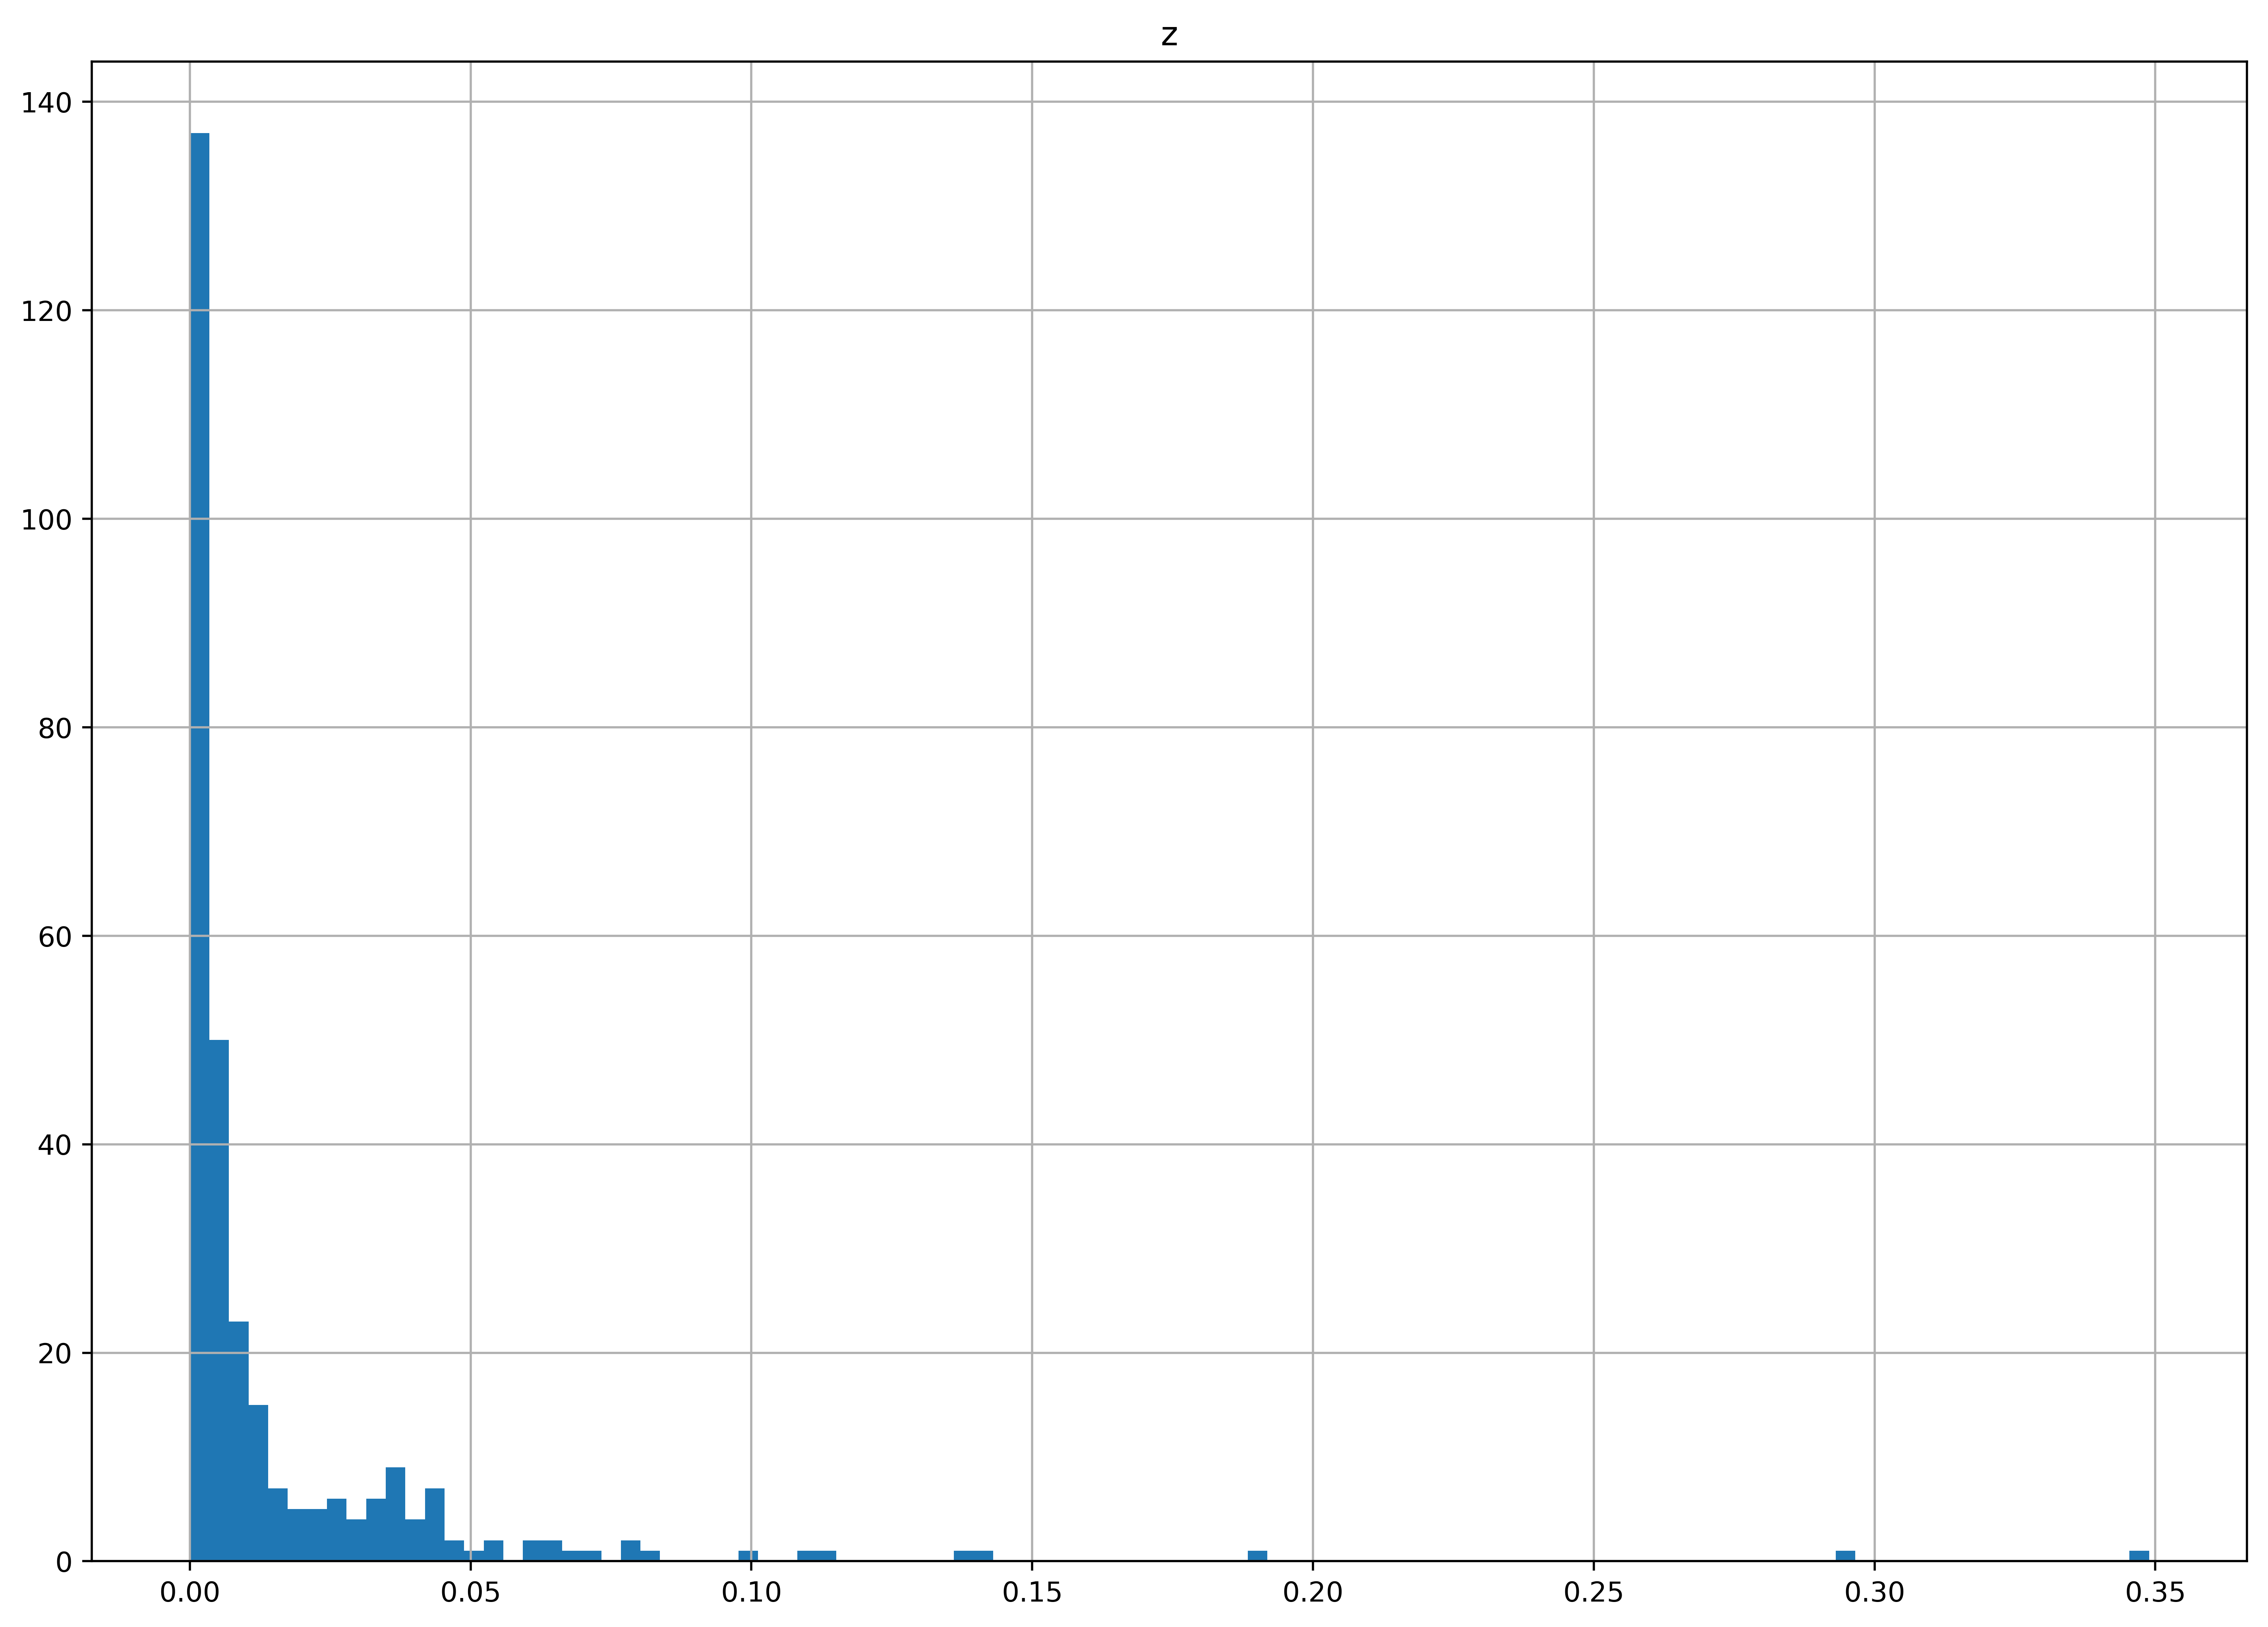

In [22]:
fig = plt.figure(figsize=(14,10), dpi=500)
ax = fig.gca()
df_z.hist(bins=100, ax=ax)